# Импортирование необходимых модулей  
---

In [96]:
import numpy as np
import pandas as pd
import warnings

import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

# Загрузка данных  
---

In [97]:
"""
Пути к файлам, содержащим тренирочный (PATH_TRAIN_DATASET)
и тестовый (PATH_TEST_DATASET) датасеты
"""

PATH_TRAIN_DATASET = r'd:\Обучение GeekBrains\cp_src\train.csv'
PATH_TEST_DATASET = r'd:\Обучение GeekBrains\cp_src\test.csv'

FILE_FEATURES_SEP = ','

In [98]:
"""
Загружаем тренировочный и тестовый датасеты.
Для загрузки используется функция read_csv(...)
"""
train_ds = pd.read_csv(
    PATH_TRAIN_DATASET,
    sep=FILE_FEATURES_SEP
)

test_ds = pd.read_csv(
    PATH_TEST_DATASET,
    sep=FILE_FEATURES_SEP
)

# Первичный анализ датасета  
---

In [99]:
"""Количество объектов на старте анализа"""
CNT_OBJ = train_ds.shape[0]
"""Отобразим краткую информацию о датасете"""
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

---  

Описание наблюдений:
1. Обнаружено два признака, в которых имеются пропуски
    - LifeSquare
    - Healthcare_1
2. Датасет содержит признаки различного типа
    - Количественные
    - Категориальные

In [100]:
"""Исследование статистических метрик датасета"""

train_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


Данный метод позволяет оценить некоторые из оценок  
1. центрального положения:  
     - Среднее. Самая элементраная оценка центрального положения. Не всегда являтся лучшей мерой центрального значения. Это объясняется тем, что среднее неустойчиво к выбросам, т.е при наличии сильно большого значения в признаке, значение данной оценки будет стремится к нему. При использовании среднего, в ряде случаев, предпочтительным будет использование оценки "усеченное среднее"
     - Медиана. Является робастной оценкой центрального положения, поскольку устойчива к выбросам.

2. вариабельности:  
    - стандартное отклонение, дисперсия. Наиболее распространенные
    - квартили



---  
Построим гистограммы для каждого признака  
С использованием полученных результатов возможно визуально оценить распределение данных

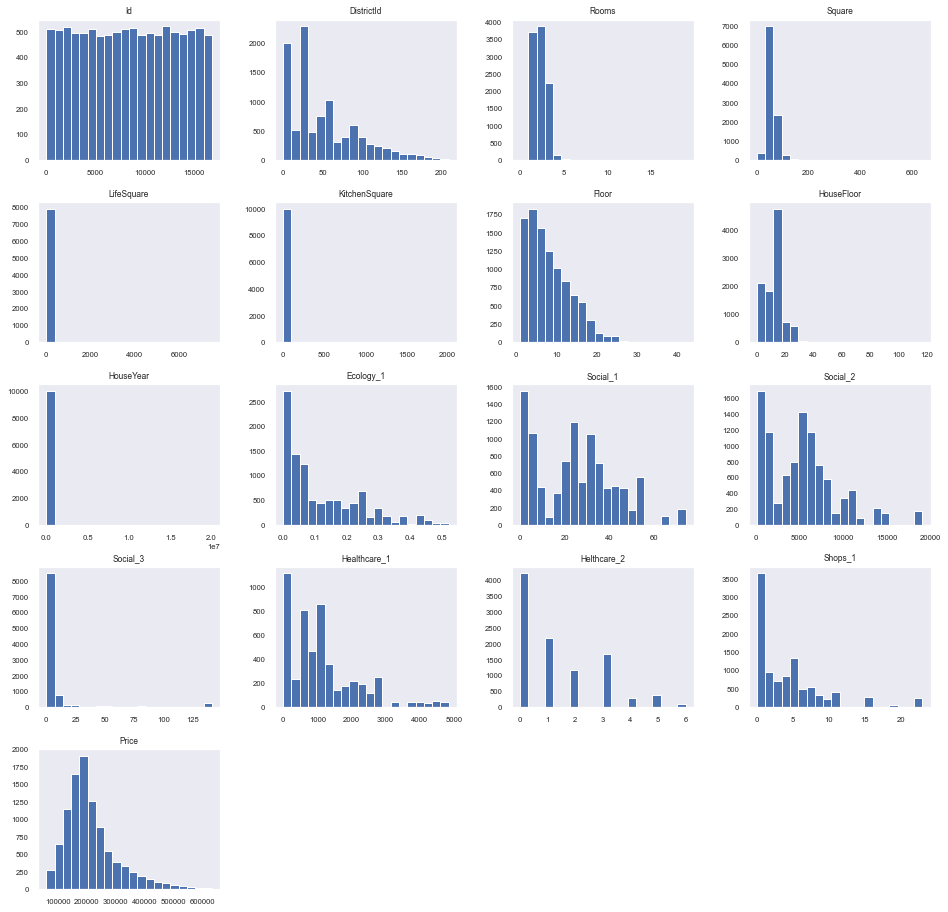

In [101]:
train_ds.hist(figsize=(16, 16), bins=20, grid=False)
plt.show()

Еще одним средством визуального анализа является оценка плотности распределения.
Построим алотность распределения для целевой переменной

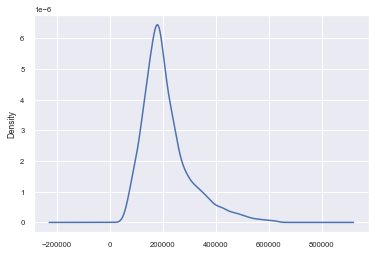

In [102]:
train_ds['Price'].plot.density()
plt.show()

# Оптимизация датасета  
---

Выделенный объем памяти для хранения фич может быть избыточным.  
Выполним попытку оптимизации занимаемого объема памяти.

In [103]:
def do_mem_optimize(ds: pd.DataFrame):
    """
    Оптимизация выделяемой памяти для каждого из признаков
    """
    def get_reduce(feature: pd.Series, available_types: list, type_group: str):
        """ 
        Контроль max и min значений фичи feature.
        Если диапазон значений фичи помещается
        в допустимый диапазон типа данных, для 
        которого выделяется меньший объем памяти, 
        выполняется преобразование данных
        """
        
        """
        Функция, которая будет вызываться
        для определения диапазона допустимых
        значений типа данных.
        
        На выбор функции оказывает влияние параметр type_group:
         - type_group == 'float' -> f_call = np.sinfo
         - type_group == 'int' -> f_call = np.iinfo
        
        Данные типа object преобразуются к типу category,
        поскольку операции с данным типов выполняются быстрее
        """
        f_call = np.iinfo if type_group == 'int' else np.finfo
        
        for a_type in available_types:
            if feature.min() >= f_call(a_type).min and feature.max() <= f_call(a_type).max:
                if a_type != feature.dtype: return feature.astype(a_type)
                else: return feature
    
    NP_INT_TYPES = [
        np.int8,
        np.int16,
        np.int32,
        np.int64,
    ]
    
    NP_FLOAT_TYPES = [
        np.float32,
        np.float64,
    ]
    
    for col_name in ds.columns:
        if ds[col_name].dtype in NP_INT_TYPES:
            ds[col_name] = get_reduce(ds[col_name], NP_INT_TYPES, 'int')
        elif ds[col_name].dtype in NP_FLOAT_TYPES:
            ds[col_name] = get_reduce(ds[col_name], NP_FLOAT_TYPES, 'float')
        else:
            ds[col_name] = ds[col_name].astype('category')    

Выполнение операции оптимизации

In [104]:
orig_size = train_ds.memory_usage().sum()
do_mem_optimize(train_ds)
reduced_size = train_ds.memory_usage().sum()

Представление результатов оптимизации в виде таблицы

In [105]:
reduce_result = pd.DataFrame({
    'orig size (bytes)': [orig_size],
    'reduced size (bytes)': [reduced_size]
})
reduce_result

,orig size (bytes),reduced size (bytes)
0,1600128,510500


Вывод: с использованием предложенного алгоритма удалось оптимизировать объем  
    занимаемой памяти примерно в 3 раза

# Обработка пропусков

Существует ряд способов обработки пропусков.

Один из таких способов - это замена пропущенных значений.

Операция замены для данных 
различных типов имеет некоторое отличие.

Для вещественных признаков значением для замены 
может служить медиана или среднее

Для категориальных признаков значением для замены 
может служить мода

В рассматриваемом датасете пропуски имеют фичи LifeSquare, Healthcare_1.  
В данной работе в качестве значения для замены пропусков в вещественных признак выбрана метрика оценки центрального положения - медиана.  
Поскольку выбросы еще не обработаны, в признаках могут встречаться значения, сильно отличающиеся от основного распределения. И если в качестве значения для замены пропусков использовать медиану, то она будет стремиться к этим аномальным значениям.  
Значение для замены пропусков в категориальных переменных - мода.  
Также для замены пропусков в вещественных переменных возможно использовать усеченное среднее. Данная метрика также (как и медиана) является робастной.

In [106]:
def fill_na(ds: pd.DataFrame):
    """
    Функция замены пропусков.
    1. Определение типа признака, в котором имеются пропуски
    2. Замена пропущенных значений
        - вещественный признак: пропуски заменяются на медиану
        - категориальный признак: пропуски заменяются на моду
    """
    for col_name in ds.columns:
        if pd.isna(ds[col_name]).sum() > 0:
            if pd.api.types.is_categorical_dtype(ds[col_name]): ds[col_name].fillna(ds[col_name].mode(), inplace=True)
            else: ds[col_name].fillna(ds[col_name].median(), inplace=True)

Обработка пропусков с использованием реализованной функции

In [107]:
fill_na(train_ds)

Оценка результата заполнения пропусков  
Результат: все пропуски заполнены

In [108]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     10000 non-null  float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   10000 non-null  float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

# Обработка выбросов и аномалий

#### 1. Обработка событий, которых в реальной жизни случиться не может

Поиск количества объектов, в которых площадь кухни >= общей площади

In [109]:
cnt_anomaly_kitchen_square = train_ds[train_ds['KitchenSquare'] >= train_ds['Square']].shape[0]
(cnt_anomaly_kitchen_square / train_ds.shape[0])*100

0.04

т.к. количество таких объектов очень мало - 0,04 %, можем их дропнуть

In [110]:
train_ds = train_ds[train_ds['KitchenSquare'] < train_ds['Square']]

Поиск количества объектов, в которых жилая площадь >= общей площади

In [111]:
cnt_anomaly_kitchen_square = train_ds[train_ds['LifeSquare'] >= train_ds['Square']].shape[0]
(cnt_anomaly_kitchen_square / train_ds.shape[0])*100

5.212084833933574

Поскольку количество таких объектов составляет 5.2 % от общей тренировочной выборки, то
удалять их не совсем правильно. 
1. Найдем средний размер жилой площади для каждого количества комнат (
Важно: среднее вычислять, не учитывая объекты, в которых жилая площадь >= общей
) 
2. Заменим жилую площадь в объектах, где есть выбросы, на соответствующее среднее значение

In [112]:
"""Формирование словаря 
{
    cnt_rooms: mean_life_square
}
"""
rooms_mean_life_square = {}

for cnt_rooms in train_ds.loc[train_ds['LifeSquare'] < train_ds['Square'], 'Rooms'].unique():
    rooms_mean_life_square[cnt_rooms] = train_ds.loc[(train_ds['Rooms'] == cnt_rooms) & (train_ds['LifeSquare'] < train_ds['Square']), 
                                                     'LifeSquare'].mean()


life_square_anomaly_obj = []

for cnt_rooms in train_ds[train_ds['LifeSquare'] >= train_ds['Square']]['Rooms']:
    life_square_anomaly_obj.append(rooms_mean_life_square[cnt_rooms])
    
"""Заменим у объектов, у которых LifeSquare >= Square 
Размер жилой площади на среднее, опираясь на количество комнат
"""
train_ds.loc[train_ds['LifeSquare'] >= train_ds['Square'], 'LifeSquare'] = life_square_anomaly_obj

In [113]:
cnt_anomaly_kitchen_square = train_ds[train_ds['LifeSquare'] >= train_ds['Square']].shape[0]
(cnt_anomaly_kitchen_square / train_ds.shape[0])*100

0.17006802721088435

Вывод: Количество таких объектов стало сильно уменьшилось

Рассчитаем процентное соотношение количества объектов, в которых количество 
комнат равно 0 к общему количеству (которое было до начала проведения анализа)

In [114]:
rooms_zero_percentely = (train_ds[train_ds['Rooms'] == 0].shape[0] / CNT_OBJ) * 100
rooms_zero_percentely

0.08

Количество очень мало - дропнем

In [115]:
train_ds = train_ds[train_ds['Rooms'] > 0]

Рассчитаем количество объектов, в которых площадь кухни больше жилой площади

In [116]:
cnt_bigger_kitchen_percently = (train_ds[train_ds['KitchenSquare'] >= train_ds['LifeSquare']].shape[0] / CNT_OBJ)*100
cnt_bigger_kitchen_percently

0.26

Количество очень мало - дропнем

In [117]:
train_ds = train_ds[train_ds['KitchenSquare'] < train_ds['LifeSquare']]

Выполним промежуточный расчет общего количества (в процентах) объектов, которые были удалены

In [118]:
rm_obj_percentely = 100 - ((train_ds.shape[0] / CNT_OBJ) * 100)
rm_obj_percentely

0.37999999999999545

Предварительный результат:  
Удалено ~ 0.38% объектов. Результата отличный  
Продолжаем

Выделим объекты, в которых суммарная площадь: (жилая + площадь кухни) больше общей площади 

In [119]:
cnt_sum_k_s_bigger_full_square_percently = (train_ds[(train_ds['LifeSquare'] + train_ds['KitchenSquare']) > train_ds['Square']].shape[0] / CNT_OBJ)*100
cnt_sum_k_s_bigger_full_square_percently

4.1000000000000005

Предлагаю следующий алгоритм для обработки подобных аномальных ситуаций  

1. Найти среднее отношения площади кухни к жилой площади для квартир с определенным количеством комнат  
2. Найти объекты, в которых (LifeSquare + KitchenSquare) > Square.  
3. У найденных объектов просуммировать KitchenSquare и LifeSquare и разделить в рамках среднего соотношения (найденного в пункте 2)

1. Добавим в DataFrame столбец со значением отношения KitchenSquare к LifeSquare

In [120]:
train_ds['ration_ks_squares'] = train_ds['KitchenSquare'] / train_ds['LifeSquare']

2. Найдем среднее соотношение для квартир с разным количеством комнат

In [121]:
rooms_ratio_kitchen_life_squares = {}

for cnt_rooms in train_ds.loc[(train_ds['LifeSquare'] + train_ds['KitchenSquare']) <= train_ds['Square'], 'Rooms'].unique():
    rooms_ratio_kitchen_life_squares[cnt_rooms] = train_ds.loc[((train_ds['LifeSquare'] + train_ds['KitchenSquare']) <= train_ds['Square']) & 
                                                              (train_ds['Rooms'] == cnt_rooms), 'ration_ks_squares'].mean()
rooms_ratio_kitchen_life_squares

{2.0: 0.17505255341529846,
 3.0: 0.14607089757919312,
 1.0: 0.2479579895734787,
 4.0: 0.14802511036396027,
 10.0: 0.2681718170642853,
 5.0: 0.108564093708992,
 19.0: 0.3214063048362732,
 6.0: 0.1550297737121582}

3. Для объектов, у которых (LifeSquare + KitchenSquare) > Square просуммируем LifeSquare + KitchenSqure, разделим в соотношении (найденном в пункте выше) и заменим данными значениями.

In [122]:
change_objects = train_ds[(train_ds['LifeSquare'] + train_ds['KitchenSquare']) > train_ds['Square']]
change_objects['sum_kitchen_life'] = change_objects['LifeSquare'] + change_objects['KitchenSquare']

means_ratio = []

for rooms in change_objects['Rooms']:
    means_ratio.append(rooms_ratio_kitchen_life_squares[rooms])

change_objects['means_ratio'] = means_ratio

change_objects['UpdateLifeSquare'] = change_objects['Square'] / (1 + change_objects['means_ratio'])
change_objects['UpdateKitchenSquare'] = change_objects['Square'] - change_objects['UpdateLifeSquare']
change_objects[['Square', 'KitchenSquare', 'LifeSquare', 'UpdateKitchenSquare', 'UpdateLifeSquare']]

,Square,KitchenSquare,LifeSquare,UpdateKitchenSquare,UpdateLifeSquare
3,53.352982,9.0,52.731510,7.948220,45.404762
48,47.080101,12.0,46.807991,9.354391,37.725710
69,64.929100,10.0,63.304604,9.672763,55.256337
129,65.102020,1.0,64.622604,12.935184,52.166836
136,92.400009,10.0,92.069237,13.765221,78.634789
...,...,...,...,...,...
9860,45.220100,13.0,44.240841,8.984826,36.235275
9874,40.631542,7.0,38.750053,8.073121,32.558421
9897,38.330353,8.0,38.010048,7.615895,30.714458
9918,104.049133,10.0,99.788383,13.415982,90.633151


In [123]:
train_ds.loc[(train_ds['LifeSquare'] + train_ds['KitchenSquare']) > train_ds['Square'], 'LifeSquare'] = change_objects['UpdateLifeSquare']
train_ds.loc[(train_ds['LifeSquare'] + train_ds['KitchenSquare']) > train_ds['Square'], 'KitchenSquare'] = change_objects['UpdateKitchenSquare']
train_ds.drop('ration_ks_squares', axis=1, inplace=True)

Выделим количество объектов (относительно общего количества), в которых номер этажа больше этажности дома

In [124]:
cnt_anomaly_bigger_floor = (train_ds[train_ds['Floor'] > train_ds['HouseFloor']].shape[0] / CNT_OBJ) * 100
cnt_anomaly_bigger_floor

18.12

Количество таких объектов очень велико. Необходимо каким-то образом их обработать.  
Заменим признак HouseFloor у объектов, у которых он равен 0 на медианное значение по признаку.  

In [125]:
train_ds.loc[train_ds['HouseFloor'] == 0, 'HouseFloor'] = train_ds['HouseFloor'].median()

У объектов, у которых Floor > HouseFloor поменяем эти признаки местами

In [126]:
train_ds['change'] = 0

save_floor = train_ds.loc[train_ds['Floor'] > train_ds['HouseFloor'], 'Floor']
save_house_floor = train_ds.loc[train_ds['Floor'] > train_ds['HouseFloor'], 'HouseFloor']

train_ds.loc[train_ds['Floor'] > train_ds['HouseFloor'], 'change'] = 1

In [127]:
train_ds.loc[train_ds['change'] == 1, 'Floor'] = save_house_floor
train_ds.loc[train_ds['change'] == 1, 'HouseFloor'] = save_floor
train_ds = train_ds.drop('change', axis = 1)

In [128]:
cnt_anomaly_bigger_floor = (train_ds[train_ds['Floor'] > train_ds['HouseFloor']].shape[0] / CNT_OBJ) * 100
cnt_anomaly_bigger_floor

0.0

In [129]:
train_ds.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981560,29.442751,6.0,7.0,9.0,1969,0.089040,B,B,33,7976,5,900.0,0,11,B,184966.93750
1,15053,41,3.0,65.683640,40.049541,8.0,7.0,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.43750
2,4765,53,2.0,44.947952,29.197611,0.0,8.0,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.90625


Выделим те объекты, в которых год постройки дома превышает значение текущего года

In [130]:
train_ds[train_ds['HouseYear'] > 2022]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265072,20.239714,9.0,9.0,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.531250
4189,11607,147,2.0,44.791836,28.360394,5.0,4.0,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.609375


Таких объекта всего два, поэтому мы можем их либо обработать, либо удалить. Предлагаю удалить

In [131]:
train_ds = train_ds[train_ds['HouseYear'] < 2022]

Проведем анализ данного признака с использованием метода квартильного анализа

<AxesSubplot:xlabel='HouseYear'>

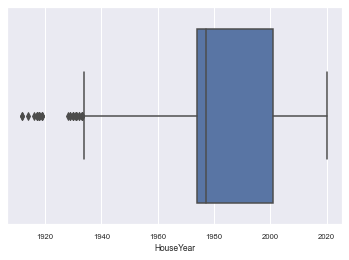

In [132]:
sb.boxplot(train_ds['HouseYear'])

Видим, что потенциальные выбросы наблюдаются в тех объектах, в которых год постройки < 1936. Нельзя однозначно сказать, выбросы это или нет, поскольку метод квартильного анализа обладает рядом недостатков. Данный метод хорошо работает на  нормальном распределении. Именно исходя из нормального распределения был определен расстояние до min, max = 1.5 * IQR. Посмотрим на распределение данного признака.

<AxesSubplot:>

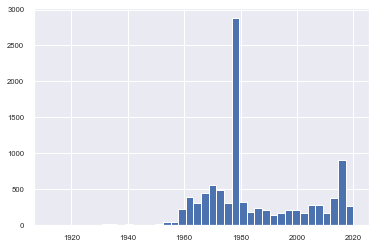

In [133]:
train_ds['HouseYear'].hist(bins=40)

Видно, что распределение не нормальное. Принимаю решение не трогать трогать этот признак. Год постройки всех объектов находится в допустимом диапазоне значений.

In [134]:
train_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,9960.0,8379.926606,4857.445994,0.000000,4166.750000,8393.500000,12585.250000,16798.000000
DistrictId,9960.0,50.411145,43.601357,0.000000,20.000000,36.000000,75.000000,209.000000
Rooms,9960.0,1.893072,0.838286,1.000000,1.000000,2.000000,2.000000,19.000000
Square,9960.0,56.302166,20.982950,1.136859,41.780320,52.535437,65.894297,641.065186
LifeSquare,9960.0,33.772381,14.378193,0.370619,25.445390,32.781261,37.715632,545.562988
KitchenSquare,9960.0,5.672783,3.932174,0.000000,1.000000,6.000000,9.000000,42.000000
Floor,9960.0,7.918273,5.182324,1.000000,4.000000,7.000000,11.000000,42.000000
HouseFloor,9960.0,13.564358,5.990055,1.000000,9.000000,14.000000,17.000000,117.000000
HouseYear,9960.0,1984.813554,18.375005,1912.000000,1974.000000,1977.000000,2001.000000,2020.000000
Ecology_1,9960.0,0.118879,0.119105,0.000000,0.017647,0.075424,0.195781,0.521867


Построим боксплоты для параметров площадей

<AxesSubplot:>

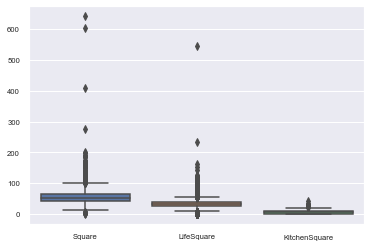

In [135]:
sb.boxplot(data=train_ds[['Square','LifeSquare', 'KitchenSquare']])

Видно, что есть большое количество выбросов. Но эти объекты могут представлять либо элитную недвижимость, либо быть не жилыми помещениями, а коммерческими.

# Выделение из датасета целевой переменной и признаков  
---

In [136]:
target = train_ds['Price']
features = train_ds.drop('Price', axis=1)
features.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000
mean,8379.926606,50.411145,1.893072,56.302166,33.772381,5.672783,7.918273,13.564358,1984.813554,0.118879,24.708534,5355.892068,8.059940,1026.427612,1.321084,4.236747
std,4857.445994,43.601357,0.838286,20.982950,14.378193,3.932174,5.182324,5.990055,18.375005,0.119105,17.529505,4005.959213,23.875449,747.065979,1.493339,4.809054
min,0.000000,0.000000,1.000000,1.136859,0.370619,0.000000,1.000000,1.000000,1912.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4166.750000,20.000000,1.000000,41.780320,25.445390,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000
50%,8393.500000,36.000000,2.000000,52.535437,32.781261,6.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,12585.250000,75.000000,2.000000,65.894297,37.715632,9.000000,11.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1015.000000,2.000000,6.000000
max,16798.000000,209.000000,19.000000,641.065186,545.562988,42.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


При анализе датасета были отмечено поле, имеющее уникальное значение для каждого объекта (Id).  
Для обучения модели наличие полей такого типа не несет никакой полезной информации.  
Удалим это поле

In [137]:
features = features.drop('Id', axis=1)

# Кодировка категориальных признаков

### Ecology_2, Ecology_3

Данные признаки возможно закодировать с использованием Label Encoder, т.к. можно сказать о том, что, чем Выше показатель (A, B, C),
тем признак является более важным. т.е., чем лучше экология, тем квартира дороже

In [138]:
l_enc = LabelEncoder()

features['Ecology_2'] = l_enc.fit_transform(features['Ecology_2'].values)
features['Ecology_3'] = l_enc.fit_transform(features['Ecology_3'].values)

### Shop_2

Аналогично Ecology

In [139]:
features['Shops_2'] = l_enc.fit_transform(features['Shops_2'].values)

## Зависимость фичей друг от друга

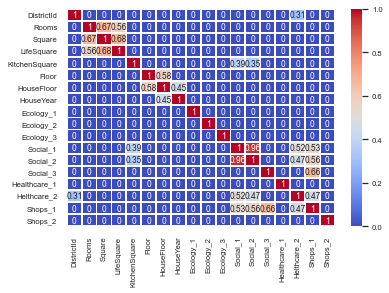

In [140]:
sb.set(font_scale=0.7)
corr_matrix = features.corr()
corr_matrix = np.round(corr_matrix, 2)

corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sb.heatmap(corr_matrix, annot=True, linewidth = .8, cmap='coolwarm')
plt.show()

Наблюдаем линейную зависимость между рядом признаков. При использовании линейной модели от данной зависимости необходимо избавлять. В своей работе я буду использовать нелинейную модель.

### Разбиение датасета на тренировочный и на тестовый

In [141]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

## Подбор параметров

In [142]:
reg_model = RandomForestRegressor()

In [143]:
model_params = {
    'n_estimators': range(10, 51, 10),
    'max_depth': range (1,13, 2),
    'min_samples_leaf': range (1,8),
    'min_samples_split': range (2,10,2)
}

In [144]:
# grid = GridSearchCV(reg_model, model_params, cv=5)
# grid.fit(features_train, target_train)

In [145]:
grid.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 40}

## Обучение модели

In [146]:
reg_model = RandomForestRegressor(max_depth=11, min_samples_leaf=1, min_samples_split=8, n_estimators=40)

In [147]:
reg_model.fit(features_train, target_train)

RandomForestRegressor(max_depth=11, min_samples_split=8, n_estimators=40)

## Предсказание на тестовом датасете

In [148]:
test_prediction = reg_model.predict(features_test)

In [149]:
r2_score(target_test, test_prediction)

0.7145660198498738

## Предсказание на валидационном датасете

In [152]:
fill_na(test_ds)

In [154]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [155]:
valid_id = test_ds['Id']
test_ds = test_ds.drop('Id', axis=1)

In [156]:
l_enc = LabelEncoder()

test_ds['Ecology_2'] = l_enc.fit_transform(test_ds['Ecology_2'].values)
test_ds['Ecology_3'] = l_enc.fit_transform(test_ds['Ecology_3'].values)
test_ds['Shops_2'] = l_enc.fit_transform(test_ds['Shops_2'].values)

In [157]:
valid_pred = reg_model.predict(test_ds)

In [158]:
result = pd.DataFrame(
    {
        'id': valid_id,
        'price': valid_pred
    }
)

In [162]:
result.to_csv(r'd:\Обучение GeekBrains\cp_src\kas_result.csv', index=False)

In [161]:
result

,id,price
0,725,156137.552000
1,15856,202785.347224
2,5480,226502.691926
3,15664,329187.802829
4,14275,136242.090634
...,...,...
4995,8180,233054.219342
4996,4695,120009.590973
4997,5783,333195.387029
4998,4780,202264.451867
